# Import Libraries

In [ ]:
#General
import numpy as np
import pandas as pd
import itertools

# System
import os, fnmatch
import time

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from sklearn.metrics import RocCurveDisplay

# Machine Learning
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from imblearn.pipeline import Pipeline as imbPipeline
!pip install -q category_encoders
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

In [ ]:
# Root Directory of project
root = "/content/drive/MyDrive/ML_Final_Project"

# Load Data

In [ ]:
features = pd.read_csv(f'{root}/Features/CHROMA.csv', index_col=0)
features

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11
0,15997,1,1,1,21,0.426531,0.627456,0.715029,0.576581,0.453580,0.508431,0.565955,0.443822,0.354638,0.374649,0.481286,0.409486
1,16001,1,2,1,21,0.392987,0.492505,0.623612,0.571851,0.530887,0.446077,0.569913,0.626373,0.469187,0.392157,0.418075,0.437141
2,16005,1,3,1,21,0.439335,0.463870,0.499159,0.587726,0.569777,0.570952,0.561026,0.477783,0.400652,0.482091,0.578783,0.516583
3,16009,1,4,1,21,0.488461,0.534350,0.568310,0.618840,0.627356,0.547109,0.484552,0.469280,0.454420,0.483986,0.500889,0.493628
4,16013,1,5,1,21,0.426701,0.461568,0.471308,0.406656,0.427444,0.560524,0.559650,0.541751,0.435585,0.407551,0.457566,0.500756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,10563,4,6,0,54,0.514507,0.497877,0.618810,0.677894,0.579274,0.525870,0.509975,0.536056,0.532481,0.397533,0.413176,0.451733
16436,10567,4,7,0,54,0.473864,0.431175,0.438327,0.445875,0.563599,0.611575,0.639518,0.640928,0.585951,0.545249,0.571068,0.587005
16437,10571,4,8,0,54,0.312178,0.334281,0.432933,0.488637,0.530956,0.562069,0.462637,0.419495,0.376633,0.356017,0.378899,0.362653
16438,10575,4,9,0,54,0.476043,0.490196,0.475176,0.446081,0.553767,0.599893,0.576215,0.561223,0.473401,0.462722,0.483837,0.470839


# Training Preperation

## Transform text id to object type because it's a categorical variable

In [ ]:
features['text_id'] = features['text_id'].astype(object)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16440 entries, 0 to 16439
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   voice_id    16440 non-null  int64  
 1   emotion_id  16440 non-null  int64  
 2   text_id     16440 non-null  object 
 3   gender      16440 non-null  int64  
 4   age         16440 non-null  int64  
 5   0           16440 non-null  float64
 6   1           16440 non-null  float64
 7   2           16440 non-null  float64
 8   3           16440 non-null  float64
 9   4           16440 non-null  float64
 10  5           16440 non-null  float64
 11  6           16440 non-null  float64
 12  7           16440 non-null  float64
 13  8           16440 non-null  float64
 14  9           16440 non-null  float64
 15  10          16440 non-null  float64
 16  11          16440 non-null  float64
dtypes: float64(12), int64(4), object(1)
memory usage: 2.3+ MB


## drop 1st 40 items (unique person voice in test data

In [ ]:
unique_test_voice = features.head(40)
unique_test_voice

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11
0,15997,1,1,1,21,0.426531,0.627456,0.715029,0.576581,0.453580,0.508431,0.565955,0.443822,0.354638,0.374649,0.481286,0.409486
1,16001,1,2,1,21,0.392987,0.492505,0.623612,0.571851,0.530887,0.446077,0.569913,0.626373,0.469187,0.392157,0.418075,0.437141
2,16005,1,3,1,21,0.439335,0.463870,0.499159,0.587726,0.569777,0.570952,0.561026,0.477783,0.400652,0.482091,0.578783,0.516583
3,16009,1,4,1,21,0.488461,0.534350,0.568310,0.618840,0.627356,0.547109,0.484552,0.469280,0.454420,0.483986,0.500889,0.493628
4,16013,1,5,1,21,0.426701,0.461568,0.471308,0.406656,0.427444,0.560524,0.559650,0.541751,0.435585,0.407551,0.457566,0.500756
5,16017,1,6,1,21,0.387090,0.542952,0.611125,0.560912,0.527688,0.562339,0.584944,0.451086,0.406281,0.450617,0.443424,0.391373
6,16021,1,7,1,21,0.548306,0.541034,0.512080,0.605944,0.611620,0.501637,0.484756,0.474188,0.528173,0.515299,0.463743,0.486994
7,16025,1,8,1,21,0.470784,0.484430,0.512601,0.458648,0.473639,0.548885,0.464359,0.432186,0.494356,0.587826,0.582073,0.457355
8,16029,1,9,1,21,0.478261,0.481646,0.456341,0.411963,0.425552,0.544776,0.551316,0.382240,0.394249,0.503068,0.687017,0.649817
9,15993,1,10,1,21,0.561910,0.693131,0.625338,0.547395,0.459807,0.395311,0.362522,0.405516,0.415027,0.424741,0.417964,0.445423


In [ ]:
features = features.iloc[40: , :]
features

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11
40,16037,1,1,1,24,0.578686,0.699712,0.741776,0.732471,0.601019,0.507517,0.499993,0.500630,0.471726,0.463569,0.467474,0.480825
41,16041,1,2,1,24,0.404699,0.620237,0.720358,0.741288,0.632367,0.473495,0.426364,0.434069,0.444411,0.414058,0.362062,0.350236
42,16045,1,3,1,24,0.444246,0.618570,0.736664,0.774864,0.604318,0.519223,0.480485,0.469897,0.460641,0.438269,0.395840,0.381181
43,16049,1,4,1,24,0.425803,0.543532,0.633729,0.676917,0.556482,0.446252,0.450541,0.439996,0.462808,0.488600,0.456680,0.425873
44,16053,1,5,1,24,0.478777,0.624245,0.726409,0.593105,0.423614,0.437020,0.447193,0.492138,0.418228,0.402376,0.398524,0.392711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,10563,4,6,0,54,0.514507,0.497877,0.618810,0.677894,0.579274,0.525870,0.509975,0.536056,0.532481,0.397533,0.413176,0.451733
16436,10567,4,7,0,54,0.473864,0.431175,0.438327,0.445875,0.563599,0.611575,0.639518,0.640928,0.585951,0.545249,0.571068,0.587005
16437,10571,4,8,0,54,0.312178,0.334281,0.432933,0.488637,0.530956,0.562069,0.462637,0.419495,0.376633,0.356017,0.378899,0.362653
16438,10575,4,9,0,54,0.476043,0.490196,0.475176,0.446081,0.553767,0.599893,0.576215,0.561223,0.473401,0.462722,0.483837,0.470839


## split data to male and female due to equal train/test split

In [ ]:
male_data = features[features['gender'] == 1]
female_data = features[features['gender'] == 0]

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    male_data.drop(['voice_id', 'gender', 'text_id'], 1),
    male_data['gender'],
    test_size=0.33, random_state=42,
    stratify=male_data['gender'])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    female_data.drop(['voice_id', 'gender', 'text_id'], 1),
    female_data['gender'],
    test_size=0.33, random_state=42,
    stratify=female_data['gender'])

X_train = pd.concat([X_train_m, X_train_f])
X_test = pd.concat([X_test_m , X_test_f, unique_test_voice.drop(['voice_id', 'gender', 'text_id'], 1)])
y_train = pd.concat([y_train_m , y_train_f])
y_test = pd.concat([y_test_m , y_test_f, unique_test_voice['gender']])
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,emotion_id,age,0,1,2,3,4,5,6,7,8,9,10,11
7169,4,24,0.606444,0.761036,0.614123,0.440852,0.411578,0.441594,0.477413,0.533903,0.555874,0.517469,0.466862,0.495457
10986,3,20,0.540342,0.574515,0.496833,0.465924,0.523010,0.590218,0.690607,0.616833,0.512100,0.510033,0.527373,0.485357
13028,1,58,0.455582,0.366741,0.416462,0.572498,0.385310,0.319278,0.343887,0.426698,0.389373,0.335900,0.328523,0.283389
12087,4,24,0.496449,0.416281,0.383306,0.408960,0.393818,0.405190,0.481735,0.608695,0.666545,0.597068,0.594626,0.575510
5439,1,30,0.513811,0.549075,0.584220,0.613510,0.627938,0.598452,0.592536,0.589816,0.642170,0.563943,0.582339,0.577978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,1,35,0.403729,0.364823,0.335980,0.323050,0.361410,0.452467,0.547270,0.593995,0.541031,0.608699,0.599848,0.499880
9917,1,26,0.619960,0.528713,0.472783,0.508519,0.464485,0.433981,0.446732,0.473131,0.569821,0.623723,0.702847,0.637183
5735,4,55,0.443269,0.385167,0.397508,0.476962,0.587579,0.605952,0.559178,0.593770,0.600190,0.565203,0.506810,0.479435
2206,3,26,0.509727,0.443558,0.474440,0.645377,0.654961,0.511234,0.467158,0.502056,0.448956,0.413271,0.508061,0.561923


In [ ]:
y_train

7169     1
10986    1
13028    1
12087    1
5439     1
        ..
6458     0
9917     0
5735     0
2206     0
7539     0
Name: gender, Length: 10987, dtype: int64

## Standardize Columns

In [ ]:
num_cols = ['age', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

cat_cols = list(X_train.select_dtypes(include='object').columns)

all_cols = cat_cols + num_cols

In [ ]:
# ohe_pipe = imbPipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
num_pipe = imbPipeline([
    ('ss', StandardScaler())
])

transformer = ColumnTransformer([
    ('number', num_pipe, num_cols),
])

X_train = transformer.fit_transform(X_train, y_train)

X_test = transformer.fit_transform(X_test, y_test)


# Function for evaluating models

In [ ]:
class Evaluation :
    
    def __init__(self,X_train,X_test,y_train,y_test):
        self.X_train=X_train
        self.X_test=X_test
        self.y_train=y_train
        self.y_test=y_test
        
    def evaluate(self,predicted_labels):
        
        print("Number of samples:",self.y_test.shape[0])
        
        print("classes : Female, Male")

        # Recall - the ability of the classifier to find all the positive samples
        print("Recall: ", recall_score(self.y_test, predicted_labels,average=None))

        # Precision - The precision is intuitively the ability of the classifier not to 
        #label as positive a sample that is negative
        print("Precision: ", precision_score(self.y_test, predicted_labels,average=None))

        # F1-Score - The F1 score can be interpreted as a weighted average of the precision 
        #and recall
        print("F1-Score: ", f1_score(self.y_test, predicted_labels, average=None))

        # Accuracy - the number of correctly classified samples
        print("Accuracy: %.2f  ," % accuracy_score(self.y_test, predicted_labels ))
       

    def cnf_matrix(self,predicted_labels):
        cnf_matrix = confusion_matrix(self.y_test, predicted_labels)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure(figsize=(12,9))
        self.plot_confusion_matrix(cnf_matrix, classes=['Female','Male'],
                              title='Confusion matrix, without normalization')

    # Function to Plot Confusion Matrix
    # http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    def plot_confusion_matrix(self,cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        """
        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
ev=Evaluation(X_train,X_test,y_train,y_test)

# Classification using MFCC

## KNN Classification With HalvingGridSearch to Find Best Parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = { 
     "n_neighbors": [3,5,7,9,11,15,20,25,30, 40, 50], 
      "metric": ['euclidean','manhattan','minkowski']    }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring="%s" % score,cv=5,verbose=1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 406
max_resources_: 10987
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 33
n_resources: 406
Fitting 5 folds for each of 33 candidates, totalling 165 fits
----------
iter: 1
n_candidates: 11
n_resources: 1218
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 2
n_candidates: 4
n_resources: 3654
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 10962
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 25}

Grid scores on development set:

0.560 (+/-0.058) for {'metric': 'euclidean', 'n_neighbors': 3}
0.600 (+/-0.048) for {'metric': 'euclidean', 'n_neighbors': 5}
0.605 (+/-0.027) for {'metric': 'euclidean', 'n_neighbors': 7}
0.620 (+/-0.053) for {'metric': 'euclidean

In [ ]:
# KNN Classifier
model = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'],metric=clf.best_params_['metric'])
model.fit(X_train, y_train);
# Predict using the Test Set
predicted_labels = model.predict(X_test)

In [ ]:
ev.evaluate(predicted_labels)

Number of samples: 5453
classes : Female, Male
Recall:  [0.67910735 0.65346882]
Precision:  [0.64088598 0.69099667]
F1-Score:  [0.6594433  0.67170899]
Accuracy: 0.67  ,


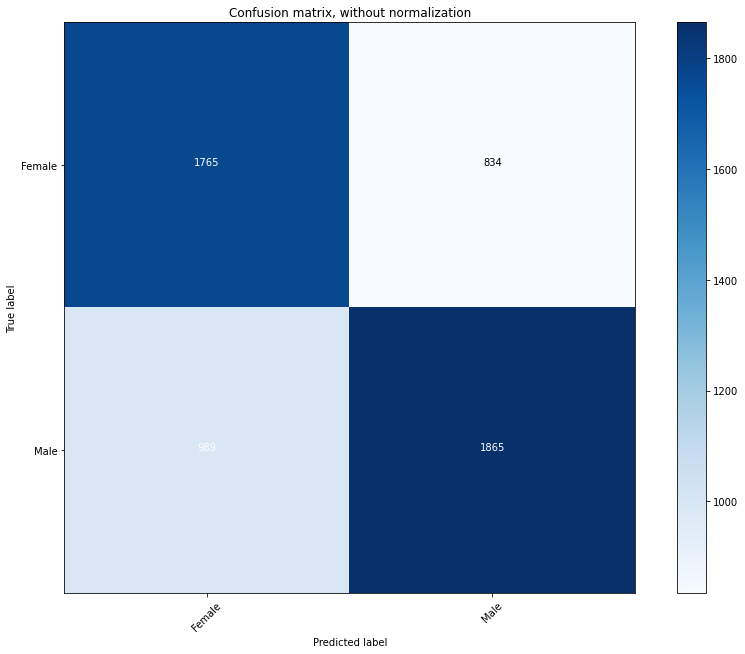

In [ ]:
ev.cnf_matrix(predicted_labels)

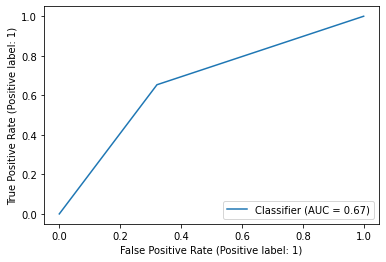

In [ ]:
RocCurveDisplay.from_predictions(y_test, predicted_labels)

## MLP Classification With HalvingGridSearch to Find Best Parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = {
     'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(MLPClassifier(max_iter=3000), tuned_parameters, scoring="%s" % score,cv=2 ,verbose=1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1220
max_resources_: 10987
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 1220
Fitting 2 folds for each of 16 candidates, totalling 32 fits
----------
iter: 1
n_candidates: 6
n_resources: 3660
Fitting 2 folds for each of 6 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


----------
iter: 2
n_candidates: 2
n_resources: 10980
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'adam'}

Grid scores on development set:

0.645 (+/-0.022) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}
0.636 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}
0.637 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.648 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.646 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'sgd'}
0.646 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
0.633 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'ada

In [ ]:
model = MLPClassifier(random_state=1,
                        activation=clf.best_params_['activation'],
                        solver=clf.best_params_['solver'],
                        alpha=clf.best_params_['alpha'],
                        learning_rate=clf.best_params_['learning_rate'])
model.fit(X_train, y_train);
# Predict using the Test Set
predicted_labels = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
ev.evaluate(predicted_labels)

Number of samples: 5453
classes : Female, Male
Recall:  [0.65 0.72]
Precision:  [0.68 0.69]
F1-Score:  [0.66 0.71]
Accuracy: 0.69  ,


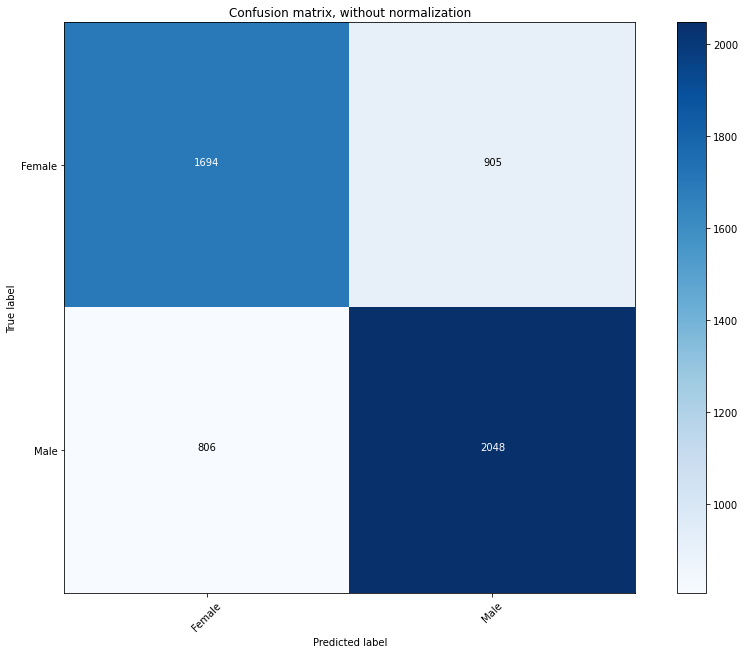

In [ ]:
ev.cnf_matrix(predicted_labels)

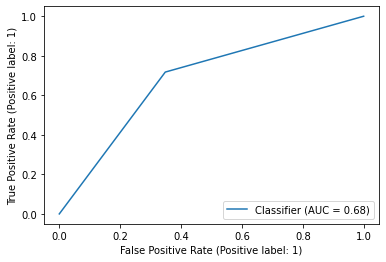

In [ ]:
RocCurveDisplay.from_predictions(y_test, predicted_labels)

## SVM Classification With HalvingGridSearch to Find Best Parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [
  {'C': [1, 10, 100], 'gamma':[0.1, 0.5,0.9], 'kernel': ['rbf']},
  {'C': [1, 10, 100], 'kernel': ['linear']},
]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(SVC(), tuned_parameters, scoring="%s" % score,cv=2,verbose=2)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1220
max_resources_: 10987
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 1220
Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.5

In [ ]:
if clf.best_params_['kernel'] == 'linear':
  model = SVC(C=clf.best_params_['C'], kernel=clf.best_params_['kernel'])
elif clf.best_params_['kernel'] == 'poly':
  model = SVC(gamma=clf.best_params_['gamma'], kernel=clf.best_params_['kernel'], C=clf.best_params_['C'])
else:
  model = SVC(C=clf.best_params_['C'], gamma=clf.best_params_['gamma'], kernel=clf.best_params_['kernel'])
model.fit(X_train, y_train)
# Predict using the Test Set
predicted_labels = model.predict(X_test)

In [ ]:
ev.evaluate(predicted_labels)

Number of samples: 5453
classes : Female, Male
Recall:  [0.63 0.72]
Precision:  [0.68 0.68]
F1-Score:  [0.65 0.7 ]
Accuracy: 0.68  ,


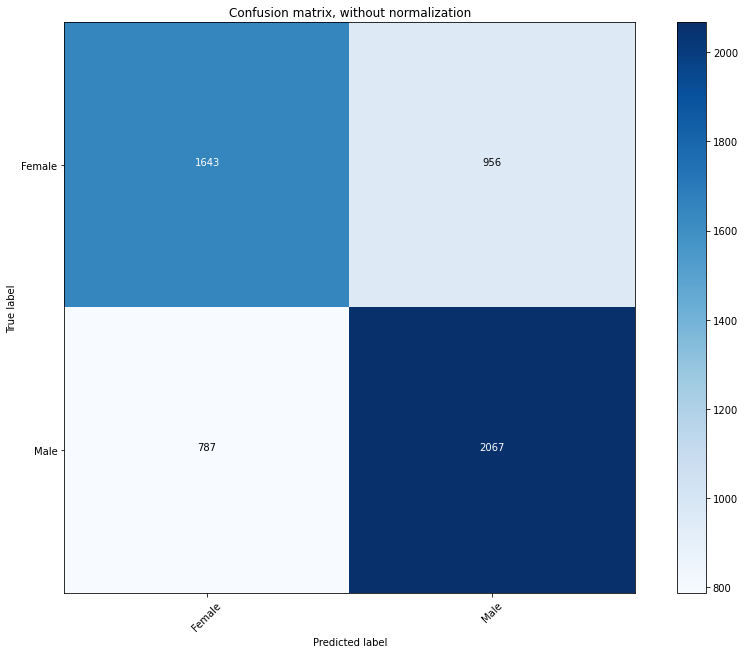

In [ ]:
ev.cnf_matrix(predicted_labels)

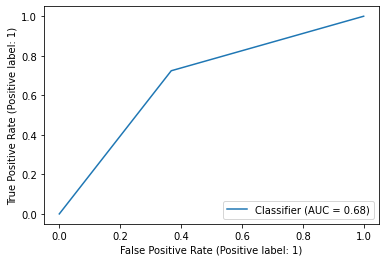

In [ ]:
RocCurveDisplay.from_predictions(y_test, predicted_labels)